# PCA for face recognition project

### 1. Cài đặt, import thư viện cần thiết

In [103]:
%pip install opencv-python scikit-learn matplotlib pillow

Note: you may need to restart the kernel to use updated packages.


In [104]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

### 2. Hàm load dữ liệu ảnh khuôn mặt

In [105]:
def load_faces(folder_path, img_size=(100, 100)):
    X, y = [], []
    labels = os.listdir(folder_path)
    for label in labels:
        label_path = os.path.join(folder_path, label)
        if os.path.isdir(label_path):
            for img_file in os.listdir(label_path):
                img_path = os.path.join(label_path, img_file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    img = cv2.resize(img, img_size)
                    X.append(img.flatten())
                    y.append(label)
    return np.array(X), np.array(y)

### 3. Tiền xử lý và huấn luyện mô hình PCA & KNN

In [106]:
X, y = load_faces("dataset")
if len(X) == 0:
    print("Dataset rỗng. Bạn cần thêm ảnh vào thư mục dataset/...")
else:
    X_mean = X.mean(axis=0)
    X_centered = X - X_mean

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_centered)

    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_pca, y)

    print("Đã huấn luyện xong mô hình với các lớp:", set(y))

Đã huấn luyện xong mô hình với các lớp: {np.str_('studentF'), np.str_('studentE'), np.str_('studentD'), np.str_('studentA'), np.str_('studentB'), np.str_('studentC')}


### 4. Nhận diện khuôn mặt từ file có sẵn

In [107]:
def recognize_image_from_path(image_path):
    if not os.path.exists(image_path):
        print("Ảnh không tồn tại:", image_path)
        return
    
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (100, 100)).flatten()
    img_pca = pca.transform([img - X_mean])
    label = knn.predict(img_pca)

    print(f"Dự đoán ảnh '{image_path}' là: {label[0]}")

    img_display = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB))
    plt.title(f"Nhận diện: {label[0]}")
    plt.axis("off")
    plt.show()

Dự đoán ảnh 'test_face_1.jpg' là: studentA


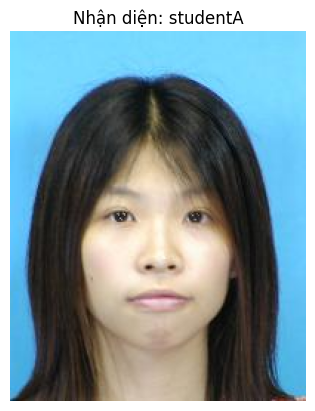

In [108]:
# Ví dụ nhận diện ảnh nằm sẵn trong thư mục
recognize_image_from_path("test_face_1.jpg")  # 

Dự đoán ảnh 'test_face_2.jpg' là: studentB


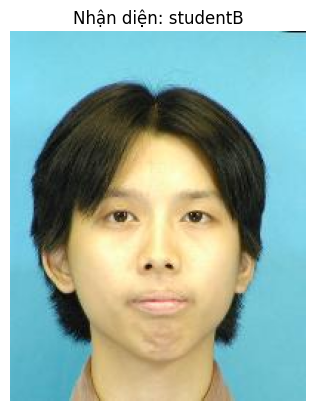

In [109]:
recognize_image_from_path("test_face_2.jpg")

Dự đoán ảnh 'test_face_4.jpg' là: studentD


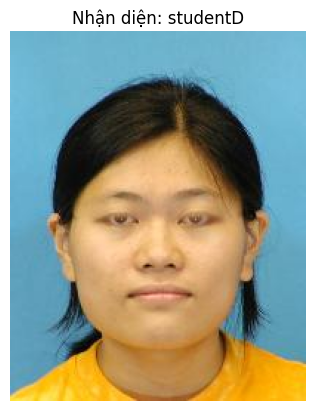

Dự đoán ảnh 'test_face_6.jpg' là: studentF


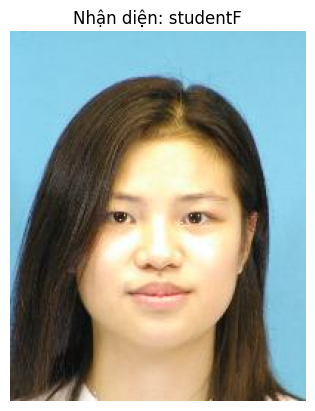

In [110]:
recognize_image_from_path("test_face_4.jpg")
recognize_image_from_path("test_face_6.jpg")

Dự đoán ảnh 'test_face_1a.png' là: studentA


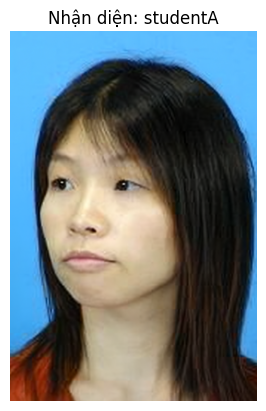

In [111]:
recognize_image_from_path("test_face_1a.png")